In [76]:
# Author: Shaik Faizan Roshan Ali
# Date: 26th August 2021
# Email: alsahercoder@gmail.com
# About: This is a Multinomial Naive Bayes Classifier for Email Spam Classification.

# Importing the Libraries

In [75]:
import pandas as pd
import numpy as np
import missingno as msno

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import r2_score

# Loading the Dataset

In [19]:
df = pd.read_csv("spam.csv")
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


# Basic Preprocessing

In [74]:
df.describe()

,Class
count,5572.000000
mean,0.134063
std,0.340751
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [20]:
# checking the ratio of class
df["Category"].value_counts() 

ham     4825
spam     747
Name: Category, dtype: int64

In [21]:
# No Null values in either column
df.isnull().sum()

Category    0
Message     0
dtype: int64

<AxesSubplot:>

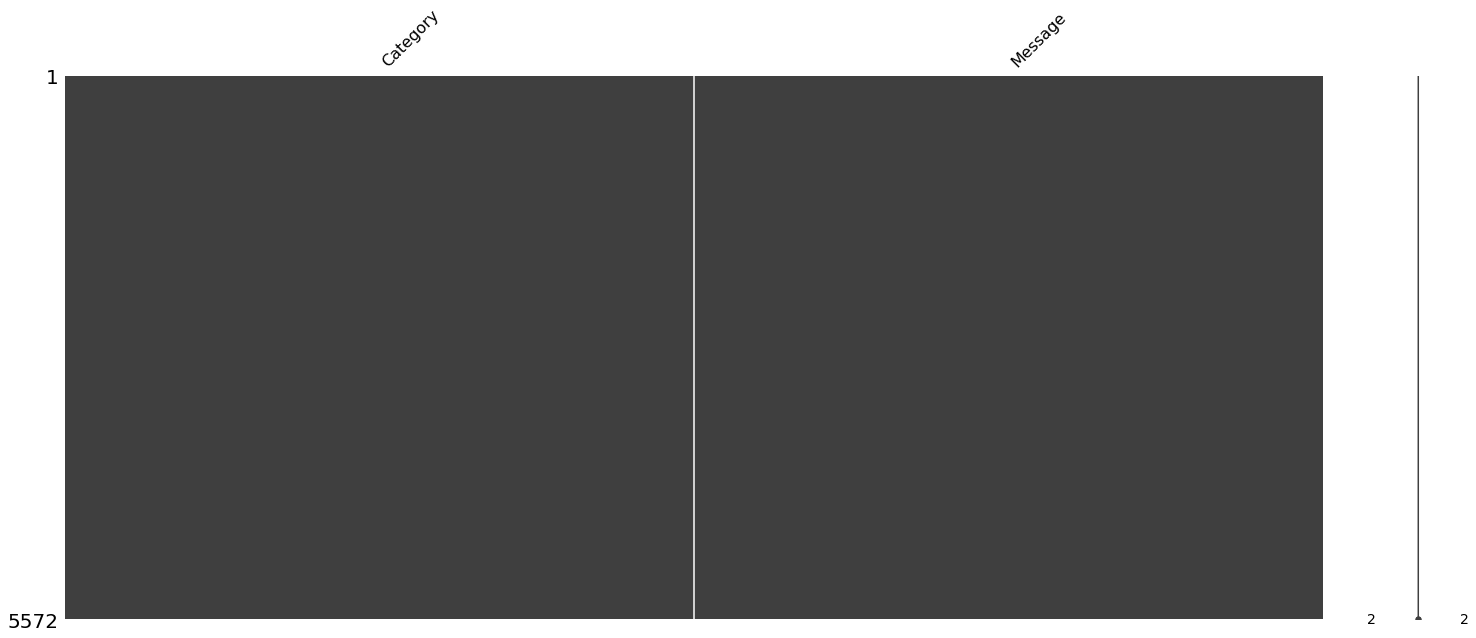

In [22]:
# visualising the above result
msno.matrix(df)

In [79]:
# Label Encoding Ham or Spam in Category feature
label_encoder = LabelEncoder()
df["Class"] = label_encoder.fit_transform(df["Category"])

df.head()

,Category,Message,Class
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [80]:
# Seperating the dependant and independent features from dataset
X = df["Message"]
Y = df["Class"]

# Using Count Vecotrizer and training the model.

In [54]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state=42,test_size=0.2)

count_vectorizer = CountVectorizer()
x_train_vector = count_vectorizer.fit_transform(x_train.values)
x_test_vector = count_vectorizer.transform(x_test)

multinomial_nb = MultinomialNB()
multinomial_model = multinomial_nb.fit(x_train_vector, y_train)

# Results

In [81]:
# root mean squared score
train_score = multinomial_model.score(x_train_vector, y_train)
test_score = multinomial_model.score(x_test_vector, y_test)

print("Training Score: ", train_score)
print("Testing Score: ", test_score)

Training Score:  0.9932690150325331
Testing Score:  0.9919282511210762


# Sample of how the count Vectorizer works function

In [73]:
# These are the feature of the count vectorizer vector
np.random.choice(count_vectorizer.get_feature_names(), size=10*10)

array(['screwd', 'parking', 'creepy', 'oyster', 'call09050000327',
       'drastic', 'ppm150', 'sunroof', 'before', 'rgds', 'anybody',
       'julianaland', 'evone', '21', 'useful', 'nasdaq', 'changes',
       'hero', 'waiting', 'of', 'suffers', 'web2mobile', 'or', 'sugar',
       'competition', 'readiness', 'closeby', '20m12aq', 'months',
       'could', 'neshanth', 'garments', 'rough', 'kodthini', 'paypal',
       'aftr', 'empty', 'while', 'sez', '3mins', 'dhoni', 'semiobscure',
       '6zf', 'minuts', 'batsman', '24th', '48922', 'ding', 'argentina',
       'usher', 'swtheart', 'hella', '3xx', 'adrink', 'everyboy', 'dload',
       'laready', 'treadmill', '08715203649', 'fromm', 'weigh',
       '08718730666', 'every', 'ke', 'give', '81618', 'going', 'odi',
       'decided', '1000', 'leanne', 'deficient', 'properly', 'ip4',
       'mundhe', 'yest', 'entered', 'pleassssssseeeeee', 'mails',
       'bubbletext', 'windows', 'asusual', 'gayle', '50award',
       'alternative', 'sight', 'frm

In [78]:
# The count values for all the feature are maintained in an array
x_train_vector.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)